#Here we are importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
# from google.colab import files
import os

#Here we are downloading NLTK resources

In [4]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatizer support
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Connecting Google Drive

#Here we are Loading the Dataset

In [3]:
import pandas as pd

file_path = "G:\minor project\deepak\WELFake_Dataset.csv"  # Update this
df = pd.read_csv(file_path)

print(df.shape)  # Check dataset size
df.head()  # View first 5 rows

(72134, 4)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
import pandas as pd

df = pd.read_csv("train.csv", header=None)

# Select only label and text
df = df[[1, 2]]
df.columns = ['label', 'text']

# Map multi-class to binary class
fake_labels = ['false', 'pants-fire', 'barely-true']
df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)


#Preprocess the Dataset
Now, let's clean the data

Check for missing values

In [6]:
print(df.isnull().sum())  # Shows missing values in each column

label    0
text     0
dtype: int64


Drop missing values (if necessary)

In [7]:
df = df.dropna()
print(df.shape)  # Check new dataset size after cleaning

(10240, 2)


Remove duplicate rows (if any)

In [8]:
df = df.drop_duplicates()
print(df.shape)  # Check dataset size after removing duplicates

(10224, 2)


#Check the dataset structure

In [9]:
print(df.info())  # Shows column names and data types

<class 'pandas.core.frame.DataFrame'>
Index: 10224 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10224 non-null  int64 
 1   text    10224 non-null  object
dtypes: int64(1), object(1)
memory usage: 239.6+ KB
None


#Check Data Distribution
If your dataset has a "label" column (Fake / Real), check distribution

Now, your dataset is loaded and cleaned

In [10]:
print(df["label"].value_counts())  # Count number of Fake & Real news

label
1    7731
0    2493
Name: count, dtype: int64


#Data set imbalance ratio calculation

In [11]:
imbalance_ratio = df['label'].value_counts().max() / df['label'].value_counts().min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 3.10


#we are using bar chart to see the imbalance in data.

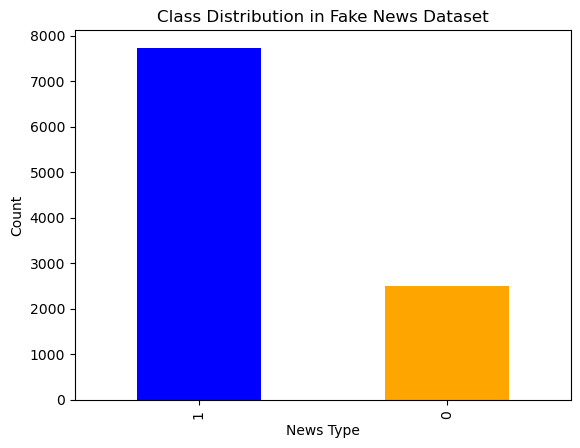

In [12]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Class Distribution in Fake News Dataset")
plt.show()

Steps for Text Preprocessing
 * Convert text to lowercase (to maintain consistency)
* Remove special characters, numbers, and punctuation
* Remove stopwords (e.g., is, the, in, and)
* Apply stemming (reduce words to root form, e.g., running → run)
* Convert text into numerical form (TF-IDF)

 Load the Dataset
Since you've already loaded the dataset, let’s check the text column:

In [13]:
print(df.head())  # View dataset structure

   label                                               text
0      1  Says the Annies List political group supports ...
1      1  When did the decline of coal start? It started...
2      1  Hillary Clinton agrees with John McCain "by vo...
3      1  Health care reform legislation is likely to ma...
4      1  The economic turnaround started at the end of ...


Install and Import Libraries

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Convert Text into Numerical Features (TF-IDF Vectorization)

Since machine learning models can’t process text directly, we convert text into numerical vectors. The TF-IDF (Term Frequency-Inverse Document Frequency) method works well for NLP tasks like Fake News Detection.

In [15]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = re.findall(r'\b\w+\b', text)  # This will extract words using regular expression
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)


# Sample text to test the preprocessing
sample_text = "This is a sample sentence for testing the text processing pipeline."

# Preprocess the text
processed_text = preprocess_text(sample_text)
print(processed_text)


sample sentence testing text processing pipeline


Why TF-IDF is Useful for Fake News Detection?


* Removes common words that don’t add meaning (e.g., "the", "is").
* Assigns higher importance to unique words (e.g., "propaganda", "hoax").
* Prepares data for ML models like Logistic Regression, SVM, or Neural Networks.



In [16]:
# Apply preprocessing to the 'text' column
df["cleaned_text"] = df["text"].apply(preprocess_text)

# Check if 'cleaned_text' is created
print(df.columns)  # Ensure 'cleaned_text' exists

Index(['label', 'text', 'cleaned_text'], dtype='object')


max_features=5000: Keeps only the top 5000 most important words (to reduce computational load).

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to 5000 features
X = vectorizer.fit_transform(df["cleaned_text"])

print(X.shape)  # Check shape of feature matrix

(10224, 5000)


 Prepare Labels for Model Training
Convert labels (Fake, Real) into numerical format (0, 1):

In [18]:
y = df["label"].map({"Fake": 0, "Real": 1})  # Encode Fake as 0, Real as 1

Here we will train our model

#Logistic Regression model

In [19]:
# Check if there are NaN values in y
print(f"NaN values in target variable: {y.isna().sum()}")

# Remove rows where y is NaN
df_clean = df.dropna(subset=['text', 'label'])  # Assuming 'text' is your feature column and 'label' is the target column

# Update X and y
X_clean = vectorizer.fit_transform(df_clean["cleaned_text"])
y_clean = df_clean["label"]

# Split data again (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


NaN values in target variable: 10224
Training Samples: 8179, Testing Samples: 2045
Accuracy: 0.6230
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.47      0.37       493
           1       0.80      0.67      0.73      1552

    accuracy                           0.62      2045
   macro avg       0.56      0.57      0.55      2045
weighted avg       0.68      0.62      0.64      2045



Saving the Model and vectorizer → So we can deploy it.

In [20]:
import joblib
joblib.dump(lr_model, 'Fake_News_Model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved.")

Model and vectorizer saved.


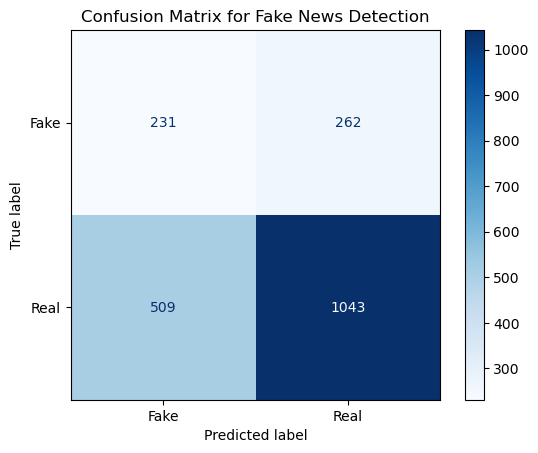

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Fake News Detection")
plt.show()

checking the file, if they existed in colab temporary.

In [22]:
import os
os.listdir()

['FakeNewsClassifierUsingBidirectionalLSTM.ipynb',
 'FakeNewsDetection.ipynb',
 'Fake_News_Detector.ipynb',
 'Fake_News_Model.pkl',
 'liar_dataset.zip',
 'NLPproject_6.ipynb',
 'nlp_progress_report.docx',
 'Paper Format Report.docx',
 'README',
 'test.tsv',
 'tfidf_vectorizer.pkl',
 'train.csv',
 'train.tsv',
 'valid.tsv']

In [23]:
# Load the saved model and vectorizer
model = joblib.load("Fake_News_Model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Preprocess the sample text
sample_text = preprocess_text("Dead broke! yes, that another doozy that Hilla..")

# Transform and convert the vector to dense
sample_vector = vectorizer.transform([sample_text]).toarray()

# Predict using the dense vector
prediction = model.predict(sample_vector)

# Print the prediction result
print("Prediction:", "Fake" if prediction[0] == 0 else "Real")


Prediction: Fake


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
def load_and_prepare(filepath):
    df = pd.read_csv(filepath, header=None)
    df = df[[1, 2]]  # [label, text]
    df.columns = ['label', 'text']

    # Drop NaNs
    df = df.dropna(subset=['text', 'label'])

    # Map multi-class to binary: 0 = fake, 1 = real
    fake_labels = ['false', 'pants-fire', 'barely-true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)

    return df

train_df = load_and_prepare("train.csv")
valid_df = load_and_prepare("valid.csv")
test_df = load_and_prepare("test.csv")

# Combine train + valid for training
combined_df = pd.concat([train_df, valid_df])

# Text preprocessing (optional: add your own cleaning here)
combined_df['cleaned_text'] = combined_df['text']
test_df['cleaned_text'] = test_df['text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(combined_df['cleaned_text'])
y_train = combined_df['label']

X_test = vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['label']

# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6559
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.48      0.40       304
           1       0.81      0.71      0.76       963

    accuracy                           0.66      1267
   macro avg       0.58      0.59      0.58      1267
weighted avg       0.70      0.66      0.67      1267



In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Optional: XGBoost (install if not available)
try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False
    warnings.warn("XGBoost not installed. Skipping XGBoost model.")

# Load and prepare function
def load_and_prepare(filepath):
    df = pd.read_csv(filepath, header=None)
    df = df[[1, 2]]
    df.columns = ['label', 'text']
    df = df.dropna(subset=['text', 'label'])
    fake_labels = ['false', 'pants-fire', 'barely-true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)
    return df

# Load data
train_df = load_and_prepare("train.csv")
valid_df = load_and_prepare("valid.csv")
test_df = load_and_prepare("test.csv")

# Combine train + valid
combined_df = pd.concat([train_df, valid_df])
combined_df['cleaned_text'] = combined_df['text']
test_df['cleaned_text'] = test_df['text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(combined_df['cleaned_text'])
y_train = combined_df['label']
X_test = vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['label']

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "SVM (Linear)": LinearSVC(class_weight='balanced', max_iter=2000),
}

if xgb_installed:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Evaluating: Logistic Regression
Accuracy: 0.6559
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.48      0.40       304
           1       0.81      0.71      0.76       963

    accuracy                           0.66      1267
   macro avg       0.58      0.59      0.58      1267
weighted avg       0.70      0.66      0.67      1267


🔍 Evaluating: Naive Bayes
Accuracy: 0.7601
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.00      0.01       304
           1       0.76      1.00      0.86       963

    accuracy                           0.76      1267
   macro avg       0.63      0.50      0.44      1267
weighted avg       0.70      0.76      0.66      1267


🔍 Evaluating: Random Forest
Accuracy: 0.7632
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.06      0.10       304
           1       0.77

c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.7593
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.05      0.08       304
           1       0.77      0.98      0.86       963

    accuracy                           0.76      1267
   macro avg       0.62      0.52      0.47      1267
weighted avg       0.70      0.76      0.67      1267



In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and prepare function
def load_and_prepare(filepath):
    df = pd.read_csv(filepath, header=None)
    df = df[[1, 2]]
    df.columns = ['label', 'text']
    df = df.dropna(subset=['text', 'label'])

    # Binary label mapping
    fake_labels = ['false', 'pants-fire', 'barely-true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)

    return df

# Load datasets
train_df = load_and_prepare("train.csv")
valid_df = load_and_prepare("valid.csv")
test_df = load_and_prepare("test.csv")

# Combine train and valid
combined_df = pd.concat([train_df, valid_df])

# Tokenization
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(combined_df['text'])

X_train = tokenizer.texts_to_sequences(combined_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])

X_train_padded = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

y_train = combined_df['label'].values
y_test = test_df['label'].values

# --------------------- LSTM Model ---------------------
print("\n🔁 Training LSTM Model")

lstm_model = Sequential([
    Embedding(MAX_NUM_WORDS, 64, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
lstm_model.summary()

lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate
y_pred_lstm = (lstm_model.predict(X_test_padded) > 0.5).astype("int32")
print("\n🧾 LSTM Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))

# --------------------- BiLSTM Model ---------------------
print("\n🔁 Training BiLSTM Model")

bilstm_model = Sequential([
    Embedding(MAX_NUM_WORDS, 64, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
bilstm_model.summary()

bilstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate
y_pred_bilstm = (bilstm_model.predict(X_test_padded) > 0.5).astype("int32")
print("\n🧾 BiLSTM Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm))
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))




🔁 Training LSTM Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 673089 (2.57 MB)
Trainable params: 673089 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


163/163 - 7s - loss: 0.5638 - accuracy: 0.7561 - val_loss: 0.5876 - val_accuracy: 0.7268 - 7s/epoch - 46ms/step
Epo

c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 706177 (2.69 MB)
Trainable params: 706177 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
163/163 - 10s - loss: 0.5556 - accuracy: 0.7541 - val_loss: 0.5759 - val_a

### Hyper Parameter Tuning

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def train_and_evaluate(model_type="lstm", param_grid={}):
    best_model = None
    best_accuracy = 0
    best_params = {}

    for embed_dim in param_grid['embedding_dim']:
        for lstm_units in param_grid['lstm_units']:
            for dropout in param_grid['dropout']:
                for lr in param_grid['learning_rate']:
                    for batch in param_grid['batch_size']:
                        print(f"\n🔍 Training {model_type.upper()} | Embed: {embed_dim}, Units: {lstm_units}, Dropout: {dropout}, LR: {lr}, Batch: {batch}")

                        model = Sequential()
                        model.add(Embedding(MAX_NUM_WORDS, embed_dim, input_length=MAX_SEQUENCE_LENGTH))

                        if model_type == "bilstm":
                            model.add(Bidirectional(LSTM(lstm_units)))
                        else:
                            model.add(LSTM(lstm_units))

                        model.add(Dropout(dropout))
                        model.add(Dense(1, activation='sigmoid'))

                        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

                        history = model.fit(
                            X_train_padded, y_train,
                            validation_split=0.1,
                            epochs=5,
                            batch_size=batch,
                            verbose=0,
                            callbacks=[EarlyStopping(patience=2, restore_best_weights=True)]
                        )

                        y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
                        acc = accuracy_score(y_test, y_pred)

                        print(f"🔹 Accuracy: {acc:.4f}")

                        if acc > best_accuracy:
                            best_accuracy = acc
                            best_model = model
                            best_params = {
                                'embedding_dim': embed_dim,
                                'lstm_units': lstm_units,
                                'dropout': dropout,
                                'learning_rate': lr,
                                'batch_size': batch
                            }

    print(f"\n🏆 Best {model_type.upper()} Accuracy: {best_accuracy:.4f}")
    print("Best Params:", best_params)
    return best_model, best_params, best_accuracy


# Hyperparameter options
param_grid = {
    'embedding_dim': [64, 128],
    'lstm_units': [64, 128],
    'dropout': [0.3, 0.5],
    'learning_rate': [1e-3, 5e-4],
    'batch_size': [32, 64]
}

# Run tuning
best_lstm_model, lstm_params, lstm_acc = train_and_evaluate("lstm", param_grid)
best_bilstm_model, bilstm_params, bilstm_acc = train_and_evaluate("bilstm", param_grid)



🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.001, Batch: 32
40/40 [==============================] - 2s 16ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.001, Batch: 64
40/40 [==============================] - 1s 14ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.0005, Batch: 32
40/40 [==============================] - 1s 10ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.0005, Batch: 64
40/40 [==============================] - 1s 15ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.5, LR: 0.001, Batch: 32
40/40 [==============================] - 1s 16ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.5, LR: 0.001, Batch: 64
40/40 [==============================] - 1s 11ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.5, LR: 0.0005, Batch: 32
40/40 [====================

40/40 [==============================] - 1s 16ms/step


C:\Users\tamra\AppData\Local\Temp\ipykernel_5832\601917716.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\tamra\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


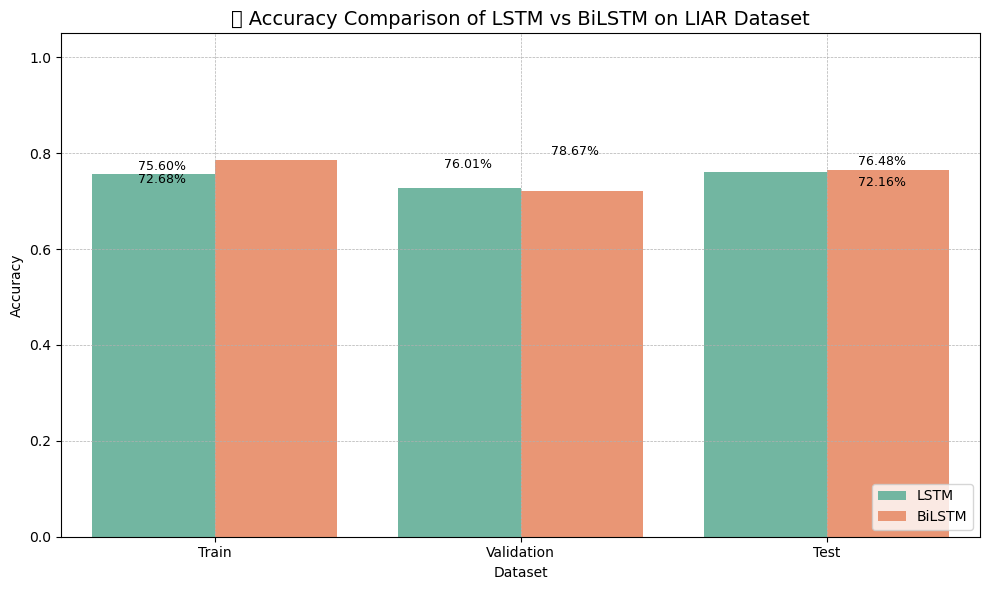

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def evaluate_model_on_sets(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
    train_preds = (model.predict(X_train) > 0.5).astype("int32")
    val_preds = (model.predict(X_val) > 0.5).astype("int32")
    test_preds = (model.predict(X_test) > 0.5).astype("int32")

    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)

    return {
        "Train": train_acc,
        "Validation": val_acc,
        "Test": test_acc,
        "Model": model_name
    }

# Create validation split index
val_split = 0.1
val_start = int((1 - val_split) * X_train_padded.shape[0])

# Split train and validation
X_train_final = X_train_padded[:val_start]
y_train_final = y_train[:val_start]

X_val_final = X_train_padded[val_start:]
y_val_final = y_train[val_start:]

# Evaluate LSTM
lstm_results = evaluate_model_on_sets(best_lstm_model, X_train_final, y_train_final, X_val_final, y_val_final, X_test_padded, y_test, "LSTM")

# Evaluate BiLSTM
bilstm_results = evaluate_model_on_sets(best_bilstm_model, X_train_final, y_train_final, X_val_final, y_val_final, X_test_padded, y_test, "BiLSTM")

# Combine results into DataFrame for plotting
results_df = pd.DataFrame([lstm_results, bilstm_results])
results_df = results_df.set_index("Model").T.reset_index().rename(columns={"index": "Dataset"})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Dataset", var_name="Model", value_name="Accuracy"), x="Dataset", y="Accuracy", hue="Model", palette="Set2")
plt.title("📊 Accuracy Comparison of LSTM vs BiLSTM on LIAR Dataset", fontsize=14)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.xlabel("Dataset")
for i, row in results_df.melt(id_vars="Dataset").iterrows():
    plt.text(i // 2 + (0.1 if row["Model"] == "BiLSTM" else -0.25), row["value"] + 0.01, f"{row['value']:.2%}", fontsize=9)
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [31]:
# Save LSTM model
best_bilstm_model.save("lstm_fake_news_model.h5")

# Save tokenizer
joblib.dump(tokenizer, "lstm_tokenizer.pkl")

c:\Users\tamra\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['lstm_tokenizer.pkl']

In [32]:
# ✅ Wrap everything for .pkl saving
class LSTMWrapper:
    def __init__(self, model_path, tokenizer):
        self.model = tf.keras.models.load_model(model_path)
        self.tokenizer = tokenizer
        self.max_length = 100  # same as used in training

    def predict(self, text):
        seq = self.tokenizer.texts_to_sequences([text])
        padded = pad_sequences(seq, maxlen=self.max_length, padding="post")
        pred = self.model.predict(padded)[0][0]
        label = "Fake" if pred < 0.5 else "Real"
        return label, float(pred if label == "Real" else 1 - pred)

In [33]:
# ✅ Create and save wrapper object
lstm_wrapper = LSTMWrapper("lstm_fake_news_model.h5", tokenizer)
joblib.dump(lstm_wrapper, "Fake_News_Model.pkl")

['Fake_News_Model.pkl']